# 데이터둘러보기

## 데이터준비

In [1]:
import numpy as np
import pandas as pd
train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')
submission = pd.read_csv( 'sampleSubmission.csv')# 제출샘플용 데이터

In [2]:
train.shape

(10886, 12)

In [3]:
test.shape

(6493, 9)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [7]:
train.info() # info 함수로 결측값 개수와 타입파악()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


# 더 효과적인 분석을 위한 피처 엔지어링

In [8]:
print(train['datetime'][100]) # 100 번째 원소
print(train['datetime'][100].split()) # 공백기준으로 나누기
print(train['datetime'][100].split()[0]) #날짜
print(train['datetime'][100].split()[1])#시간

2011-01-05 09:00:00
['2011-01-05', '09:00:00']
2011-01-05
09:00:00


In [9]:
#시간 문자열을 시,분,초로 나누기
print(train['datetime'][100].split()[1])#시간
print(train['datetime'][100].split()[1].split(":"))#':'기준으로 문자열로 니누기
print(train['datetime'][100].split(":")[0]) #시
print(train['datetime'][100].split(":")[1]) #분
print(train['datetime'][100].split(":")[2])#초

09:00:00
['09', '00', '00']
2011-01-05 09
00
00


In [10]:
 #판다스 apply( ) 함수로 앞서 살펴본 로직을 datetime에 적용해 날짜(date), 연도(year),
# 월(month), 일(day), 시(hour), 분(minute), 초(second) 피처 생성
train['date'] = train['datetime'].apply(lambda x: x.split()[0]) # 날짜 피처 생성
# 연도, 월, 일, 시, 분, 초 피처를 차례로 생성
train['year'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x: x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[0])
train['minute'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[1])
train['second'] = train['datetime'].apply(lambda x: x.split()[1].split(':')[2])

In [11]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,2011,01,01,00,00,00
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,2011,01,01,01,00,00
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,2011,01,01,02,00,00
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,2011,01,01,03,00,00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,2011,01,01,04,00,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,2012,12,19,19,00,00
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,2012,12,19,20,00,00
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,2012,12,19,21,00,00
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012-12-19,2012,12,19,22,00,00


In [12]:
from datetime import datetime
import calendar
print(train['date'][100])#날짜
print(datetime.strptime(train['date'][100],"%Y-%m-%d"))#dateime 타입으로 변경
#정수로 요일변환
print(datetime.strptime(train['date'][100],"%Y-%m-%d").weekday())
#문자열로 요일변환
print(calendar.day_name[datetime.strptime(train['date'][100],"%Y-%m-%d").weekday()])

2011-01-05
2011-01-05 00:00:00
2
Wednesday


In [13]:
#요일피처추가
train["weekday"]=train['date'].apply(
      lambda dateString:
       calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

In [14]:
#피처추가
train['season']=train['season'].map({1:'Spring',
                                     2:'Summer',
                                     3: 'Fall',
                                     4: 'Wenter'})
train['weather']=train['weather'].map({1:'Clear',
                                       2:"Mist,Fewclouds",
                                       3:"Ligth Snow,Rain,Thuderstorm",
                                       4:"Heavy Rain,Thunderstorm,Snow,Fog"})

# 시각화

In [15]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

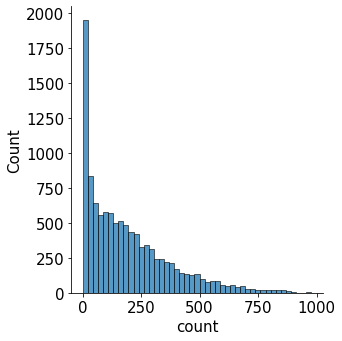

In [16]:
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정 
sns.displot(train['count']); # 분포도 출력

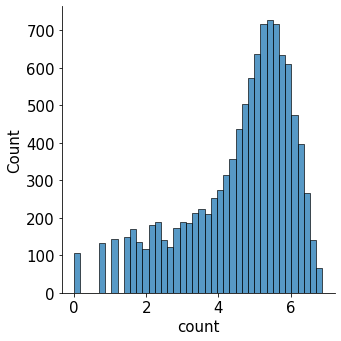

In [17]:
sns.displot(np.log(train['count'])); # 데이터 시각화

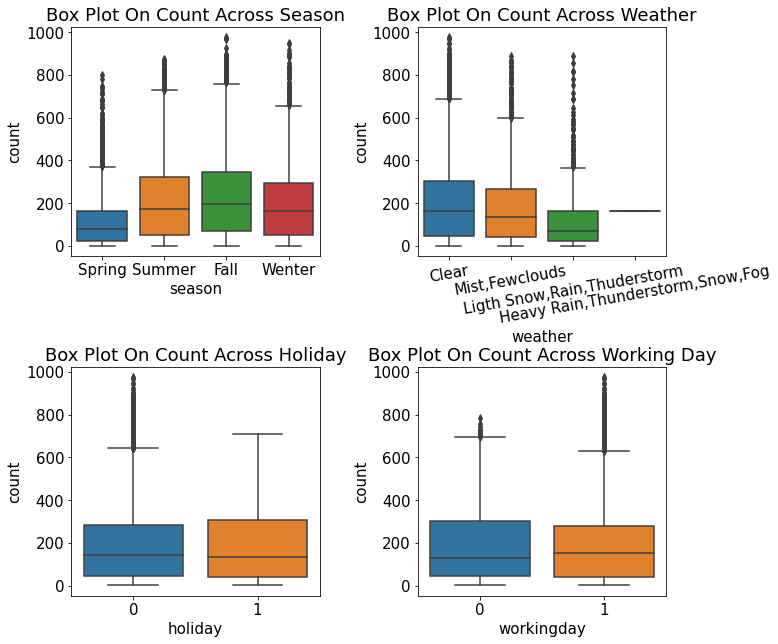

In [18]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

<AxesSubplot:xlabel='hour', ylabel='count'>

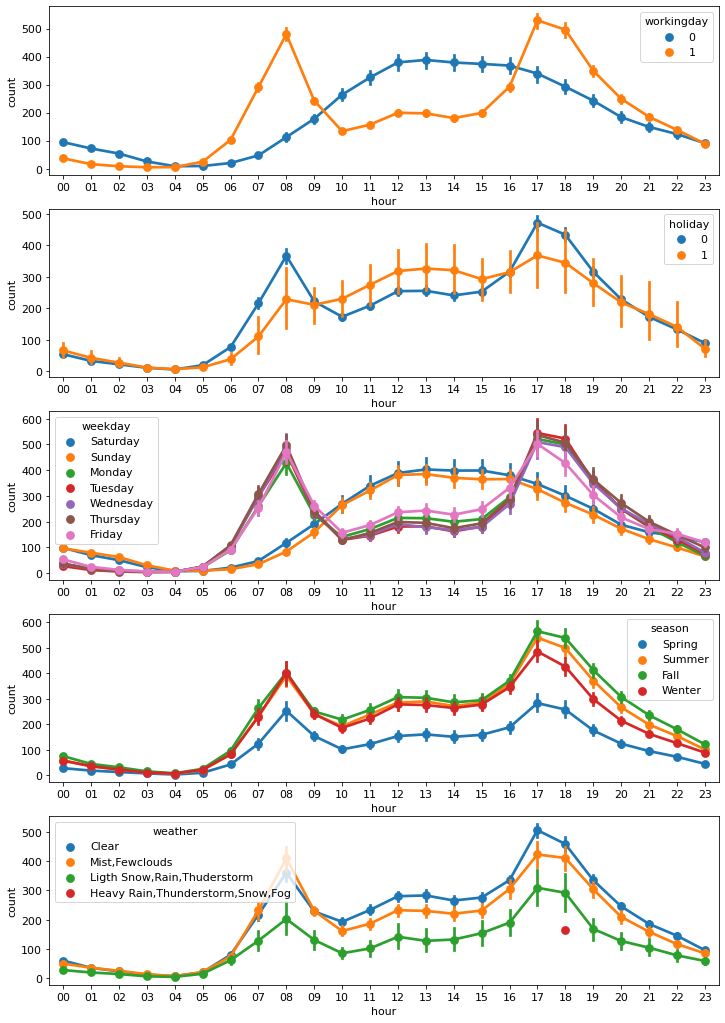

In [19]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

<AxesSubplot:xlabel='humidity', ylabel='count'>

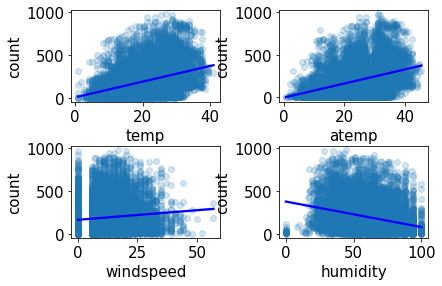

In [20]:
#스탭1, m형,n형 Figure 준비
mpl.rc('font',size=15)
figre,axes=plt.subplots(nrows=2,ncols=2)#2행2열
plt.tight_layout()
figure.set_size_inches(7, 6)

#스탭2  서브플롯할당
#온도,체검완도,풍속,습도별대여 수량산점도그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})

In [21]:
train[['temp','atemp','humidity','windspeed','count']]

,temp,atemp,humidity,windspeed,count
0,9.84,14.395,81,0.0000,16
1,9.02,13.635,80,0.0000,40
2,9.02,13.635,80,0.0000,32
3,9.84,14.395,75,0.0000,13
4,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,336
10882,14.76,17.425,57,15.0013,241
10883,13.94,15.910,61,15.0013,168
10884,13.94,17.425,61,6.0032,129


[Text(0.5, 1.0, 'Heatmap of Numerical Data')]

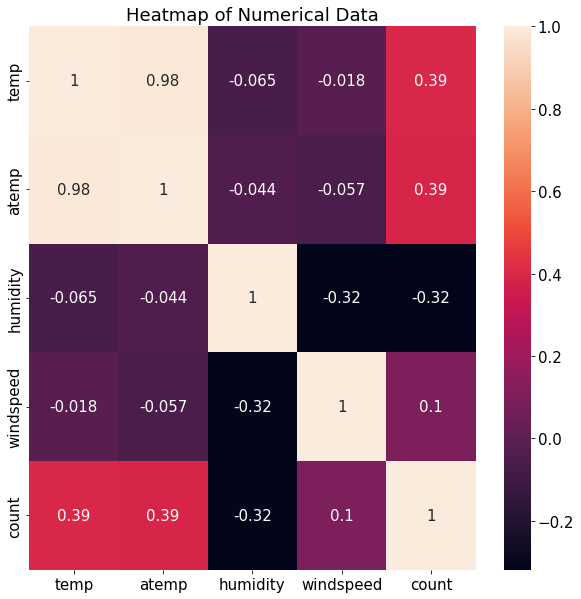

In [22]:
corrMat=train[['temp','atemp','humidity','windspeed','count']].corr()
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corrMat,annot=True)#상관관계히트맵그리기
ax.set(title="Heatmap of Numerical Data")

In [1]:

x.shape

NameError: name 'x' is not defined

# 베이스라인 모델 구성

In [65]:
import numpy as np
import pandas as pd
train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')
submission = pd.read_csv( 'sampleSubmission.csv')# 제출샘플용 데이터

In [66]:
train=train[train["weather"] !=4]

In [67]:
all_data = pd.concat([train, test], ignore_index=True)
all_data.shape

(17378, 12)

In [68]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17378 entries, 0 to 17377
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17378 non-null  object 
 1   season      17378 non-null  int64  
 2   holiday     17378 non-null  int64  
 3   workingday  17378 non-null  int64  
 4   weather     17378 non-null  int64  
 5   temp        17378 non-null  float64
 6   atemp       17378 non-null  float64
 7   humidity    17378 non-null  int64  
 8   windspeed   17378 non-null  float64
 9   casual      10885 non-null  float64
 10  registered  10885 non-null  float64
 11  count       10885 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.6+ MB


In [70]:
from datetime import datetime
# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data['weekday'] = all_data['date'].apply(
    lambda dateString:
datetime.strptime(dateString, "%Y-%m-%d").weekday())

In [71]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)
all_data

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,16.0,2011,00,5
1,1,0,0,1,9.02,13.635,80,40.0,2011,01,5
2,1,0,0,1,9.02,13.635,80,32.0,2011,02,5
3,1,0,0,1,9.84,14.395,75,13.0,2011,03,5
4,1,0,0,1,9.84,14.395,75,1.0,2011,04,5
...,...,...,...,...,...,...,...,...,...,...,...
17373,1,0,1,2,10.66,12.880,60,NaN,2012,19,0
17374,1,0,1,2,10.66,12.880,60,NaN,2012,20,0
17375,1,0,1,1,10.66,12.880,60,NaN,2012,21,0
17376,1,0,1,1,10.66,13.635,56,NaN,2012,22,0


In [ ]:
# 탐색적 데이터 분석에서 얻은 인사이트를 활용해 의미 있는 피처와 불필요한 피처를 구분(피처 d선택)
# -피처가 많다고 무조건 좋은 게 아님
# - 예측 성능을 높이려면 타깃값과 관련 있는 피처가 필요
# - 탐색적 데이터 분석, 피처 중요도, 상관관계 매트릭스, 배경 지식을 종합적으로 활용해 판단해야 함

In [72]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

In [ ]:
# 평가지표 계산함수 작성

In [73]:
# 평가지표 계산함수 작성
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [113]:
from sklearn.linear_model import LinearRegression
linar_reg_model=LinearRegression()
log_y=np.log(y)#도포가 치우지않기 위해 
linar_reg_model.fit(X_train,log_y)
preds=linar_reg_model.predict(X_train)
print(f"선형회귀의 RMSLE 값: {rmsle(log_y,preds,True):.4f}")

선형회귀의 RMSLE 값: 1.0205


In [75]:
preds=linar_reg_model.predict(X_train)

#모델 성능 검증
훈련된 예측후 모델검증훈련된 예측수행

In [76]:
print(f"선형회귀의 RMSLE 값: {rmsle(log_y,preds,True):.4f}")

선형회귀의 RMSLE 값: 1.0205


In [77]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
ridge_model=Ridge()

In [114]:
#하이퍼파리머터 값 목록
ridge_prarms={'max_ilter':[3000],'alpha':[0.1,1,2,3,4,10,30,100,200,400,800,900,1000]}
#교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer=metrics.make_scorer(rmsle,greater_is_better=False)
#그리드 서치 
gridsarch_ridge_model=GridSearchCV(estimator=ridge_model,
                                        param_grid=ridge_prarms,
                                     scoring=rmsle_scorer,
                                     cv=5)

log_y=np.log(y)#도포가 치우지않기 위해 
ridge_model.fit(X_train,log_y)
preds=ridge_model.predict(X_train)
print(f"릿지회귀의 RMSLE 값: {rmsle(log_y,preds,True):.4f}")

릿지회귀의 RMSLE 값: 1.0205


In [80]:

log_y=np.log(y)#도포가 치우지않기 위해 
ridge_model.fit(X_train,log_y)

Ridge()

In [104]:
preds=ridge_model.predict(X_train)

In [105]:
print(f"릿지회귀의 RMSLE 값: {rmsle(log_y,preds,True):.4f}")

릿지회귀의 RMSLE 값: 1.0205


In [115]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


In [107]:
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


In [108]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 120, 140], 'random_state': [42]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [109]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


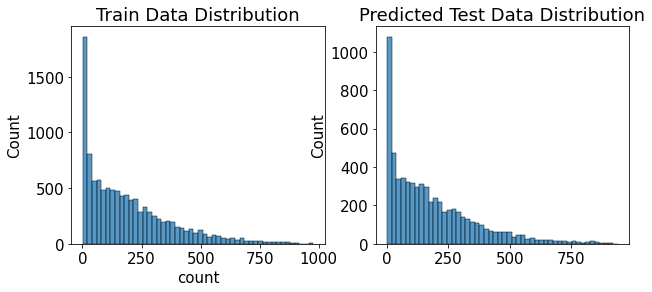

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [ ]:
 RMSELE가 1.0205 였던 선형모델, 릿지,라쏘에 비해 큰폭으로 계선됨
    네모델 가운데 가장 우수한 모델은 렌덤 포렐스트 

In [112]:
submission['count'] = np.exp(randomforest_preds) # 지수변환
submission.to_csv('submission.csv', index=False)
submission

,datetime,count
0,2011-01-20 00:00:00,12.127016
1,2011-01-20 01:00:00,4.981274
2,2011-01-20 02:00:00,3.209022
3,2011-01-20 03:00:00,3.503956
4,2011-01-20 04:00:00,2.680269
...,...,...
6488,2012-12-31 19:00:00,212.989952
6489,2012-12-31 20:00:00,170.625628
6490,2012-12-31 21:00:00,99.297557
6491,2012-12-31 22:00:00,100.681092
